# INTER-SUBJECT CORRELATION

In [2]:
import numpy as np
from scipy.stats import pearsonr
import scipy.io

def inter_subject_corr(data):
    n = data.shape[0]
    corr_mat = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if j != i:
                corr, _ = pearsonr(data[i, :], data[j, :])
                corr_mat[i, j] = corr

    # Calculating the mean and standard deviation
    mean_corr = np.mean(corr_mat)
    std_corr = np.std(corr_mat)

    return corr_mat, mean_corr, std_corr

predicted_fc_path = '/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat'
efc = scipy.io.loadmat(predicted_fc_path)['out']
pfc = scipy.io.loadmat(predicted_fc_path)['predicted']

inter_efc, mean_inter_efc, std_inter_efc = inter_subject_corr(efc)
inter_pfc, mean_inter_pfc, std_inter_pfc = inter_subject_corr(pfc)

print(f"Inter-eFC correlation: {mean_inter_efc} (std: {std_inter_efc})")
print(f"Inter-pFC correlation: {mean_inter_pfc} (std: {std_inter_pfc})")


Inter-eFC correlation: 0.6132042760214722 (std: 0.09071272131188801)
Inter-pFC correlation: 0.7031759617908142 (std: 0.10476766140748814)


In [6]:
# Calculate Pearson correlation between each pair of true and predicted outputs
correlations = [scipy.stats.pearsonr(inter_efc[i, :], inter_pfc[i, :])[0] for i in range(inter_efc.shape[0])]

# Calculate mean Pearson correlation
mean_corr = np.mean(correlations)

print(mean_corr)

0.25757602310726935


### GRAPHS

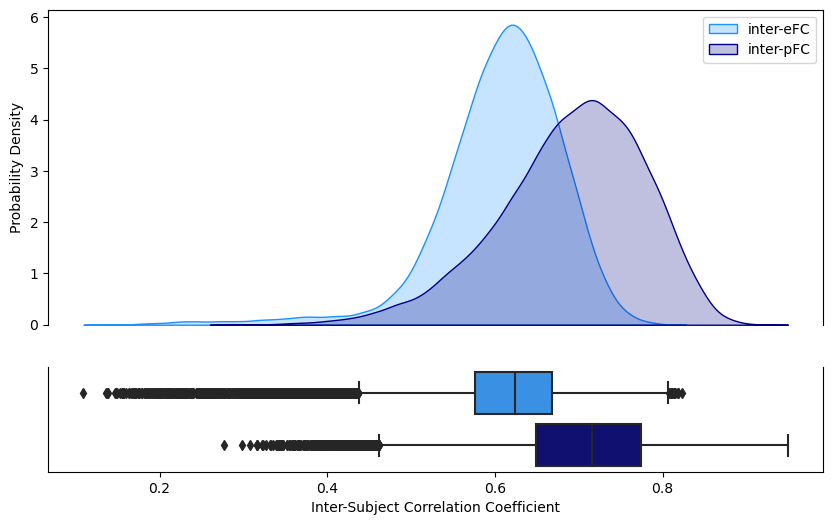

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Flatten the inter-subject correlation matrices and remove self-correlations (diagonal elements)
inter_efc_flat = inter_efc[np.triu_indices(inter_efc.shape[0], k=1)]
inter_pfc_flat = inter_pfc[np.triu_indices(inter_pfc.shape[0], k=1)]

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Type': ['inter-eFC'] * len(inter_efc_flat) + ['inter-pFC'] * len(inter_pfc_flat),
    'Correlation': np.concatenate([inter_efc_flat, inter_pfc_flat])
})

# Create a color palette
palette = {'inter-eFC': 'dodgerblue', 'inter-pFC': 'navy'}

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=False, gridspec_kw={'height_ratios': [3,1]})

# Kernel Density Estimate (KDE) plot
for t in ['inter-eFC', 'inter-pFC']:
    sns.kdeplot(data[data.Type == t].Correlation, fill=True, color=palette[t], label=t, ax=axes[0])
axes[0].set_ylabel('Probability Density')
axes[0].set_xlabel('')
axes[0].get_xaxis().set_ticks([])
axes[0].legend(title=None)
axes[0].spines['bottom'].set_visible(False)


# Boxplot
sns.boxplot(data=data, x='Correlation', y='Type', palette=palette, ax=axes[1])
axes[1].set_xlabel('Inter-Subject Correlation Coefficient')
axes[1].set_ylabel('')
axes[1].get_yaxis().set_ticks([])
axes[1].spines['top'].set_visible(False)


# plt.subplots_adjust(hspace=0.1)
plt.show()

# EFC-PFC CORRELATION

In [37]:
import numpy as np
import scipy.stats
import scipy.io

def mean_pearson_corr(predicted_fc_path, matrix1, matrix2):
    # Load true and predicted outputs
    m1 = scipy.io.loadmat(predicted_fc_path)[matrix1]
    m2 = scipy.io.loadmat(predicted_fc_path)[matrix2]

    # Check that shapes match
    if m1.shape != m2.shape:
        raise ValueError("Connectivity matrices must have the same shape.")

    # Calculate Pearson correlation between each pair of true and predicted outputs
    correlations = [scipy.stats.pearsonr(m1[i, :], m2[i, :])[0] for i in range(m1.shape[0])]
    # correlations = [scipy.stats.pearsonr(m1[i, :], m2[i, :])[0] for i in range(50)]

    # Calculate mean Pearson correlation
    mean_corr = np.mean(correlations)
    std_corr = np.std(correlations)

    return correlations, round(mean_corr, 2), round(std_corr, 2)


In [38]:
predicted_fc_path = '/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat'
individual_corrs, mean_corr, std_corr = mean_pearson_corr(predicted_fc_path, 'out', 'predicted')
print(f"Mean Pearson correlation eFC-pFC: {mean_corr} (std:{std_corr})")

Mean Pearson correlation eFC-pFC: 0.68 (std:0.08)


In [39]:
predicted_fc_path = '/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat'
individual_corrs, mean_corr, std_corr = mean_pearson_corr(predicted_fc_path, 'in', 'out')
print(f"Mean Pearson correlation SC-eFC: {mean_corr} (std:{std_corr})")

Mean Pearson correlation SC-eFC: 0.06 (std:0.06)


In [40]:
predicted_fc_path = '/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat'
individual_corrs, mean_corr, std_corr = mean_pearson_corr(predicted_fc_path, 'in', 'predicted')
print(f"Mean Pearson correlation SC-pFC: {mean_corr} (std:{std_corr})")

Mean Pearson correlation SC-pFC: 0.06 (std:0.06)


### GRAPHS

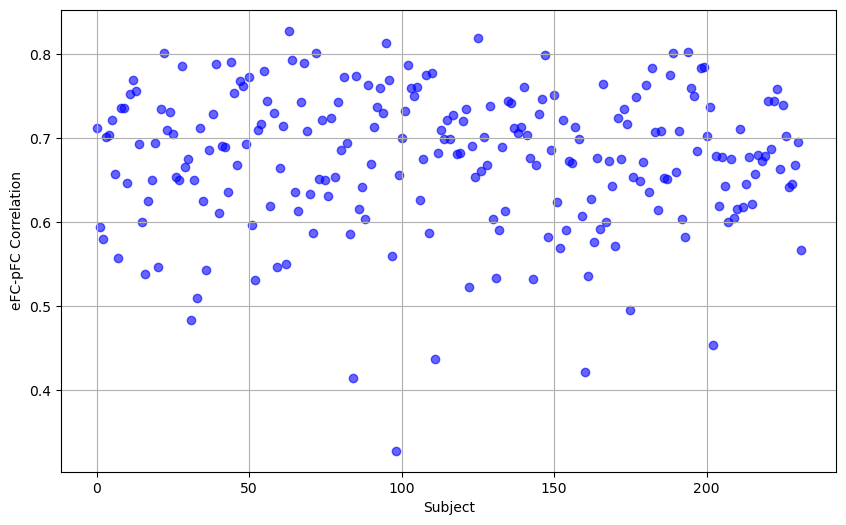

In [34]:
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(range(len(individual_corrs)), individual_corrs, color='b', alpha=0.6)
plt.xlabel('Subject')
plt.ylabel('eFC-pFC Correlation')
plt.grid(True)
plt.show()